Disclaimer: This document is a Colab Python file, created during one of the Supervised Learning lectures given by Professor Christian Calvo Masis. Therefore, all the credits for this Colab should be attributed to him.

In [22]:
# Importar bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

In [15]:

# cargar datos
iris = load_iris()

#preparar pd de pandas para visualizar
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [16]:
#Ver datos ejemplo
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
108,6.7,2.5,5.8,1.8,virginica
139,6.9,3.1,5.4,2.1,virginica
73,6.1,2.8,4.7,1.2,versicolor
117,7.7,3.8,6.7,2.2,virginica
7,5.0,3.4,1.5,0.2,setosa
89,5.5,2.5,4.0,1.3,versicolor
107,7.3,2.9,6.3,1.8,virginica
30,4.8,3.1,1.6,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
57,4.9,2.4,3.3,1.0,versicolor


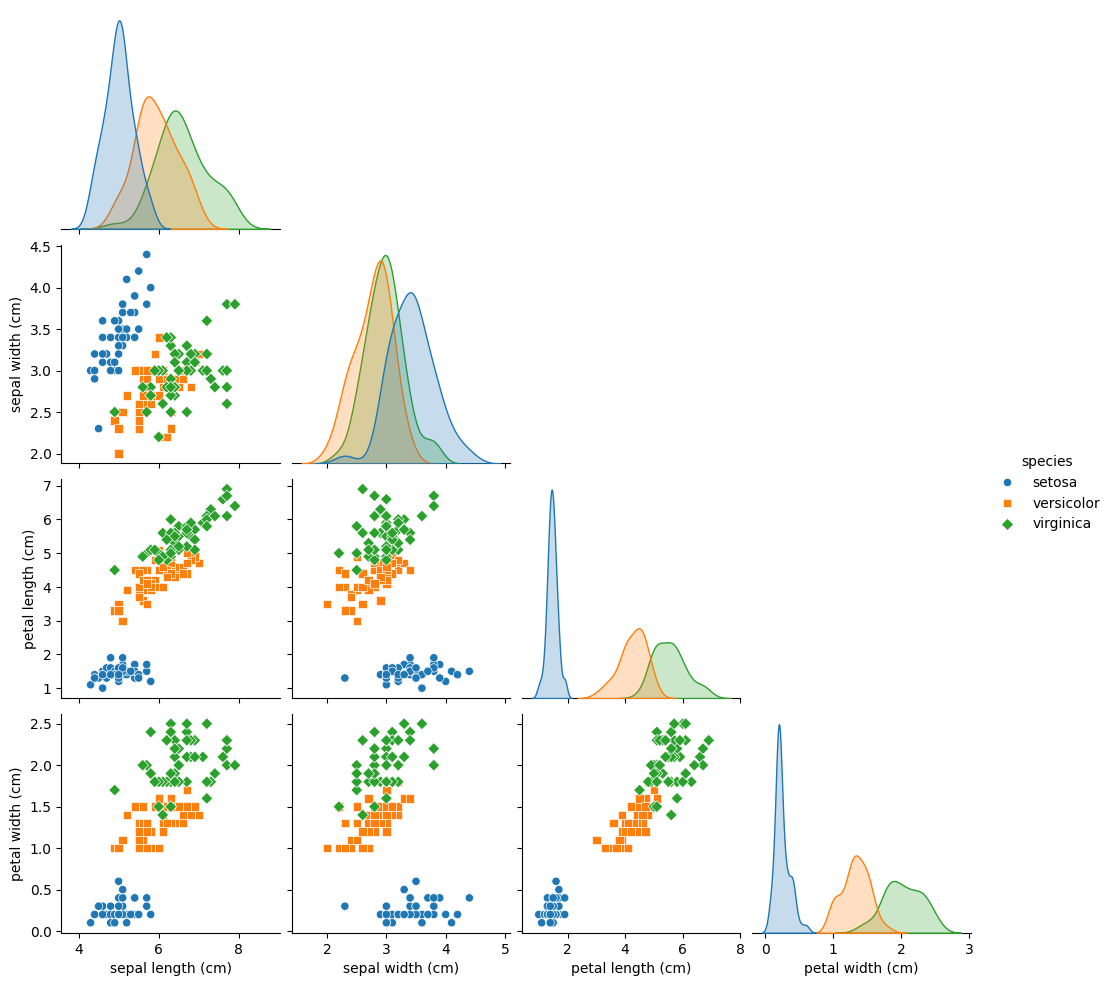

In [17]:
# Pairplot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], corner=True)
plt.show()

#Petal Length vs. Petal Width:

**Setosa**: Forma un cluster con pétalos más cortos y angostos.

**Versicolor**: Largo y ancho de pétalos es intermedio, tiene algún traslape con Virginica.

**Virginica**: Generalmente tiene pétalos más largos y anchos. Forma un cluster un poco distinto que la Versicolor.


#Sepal Length vs. Sepal Width:

**Setosa**: Forma un grupo con sépalos más anchos que largos, se distinque de los otros dos tipos.

**Versicolor and Virginica**: Tienen un traslape con largos similares de sépalo, es difícil diferenciarlas solo por esto aunque la Virginica tiene los más largos.

#Sepal Length vs. Petal Length:

La setosa se separa claramente dado los pétalos más cortos.
Hay una transición gradual de Setosa a Versicolor y a Virgínica.

# Sepal Width vs Petal Width:

La Setosa forma un cluster separado con pétalos más angostos.

La Versicolor y la Virginica tienen mayor traslape, pero la Virginica muestra los pétalos más anchos en promedio.


In [7]:
#preparar datos para el modelo
X, y = iris.data, iris.target
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [18]:

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [19]:

# Entrenar el modelo
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

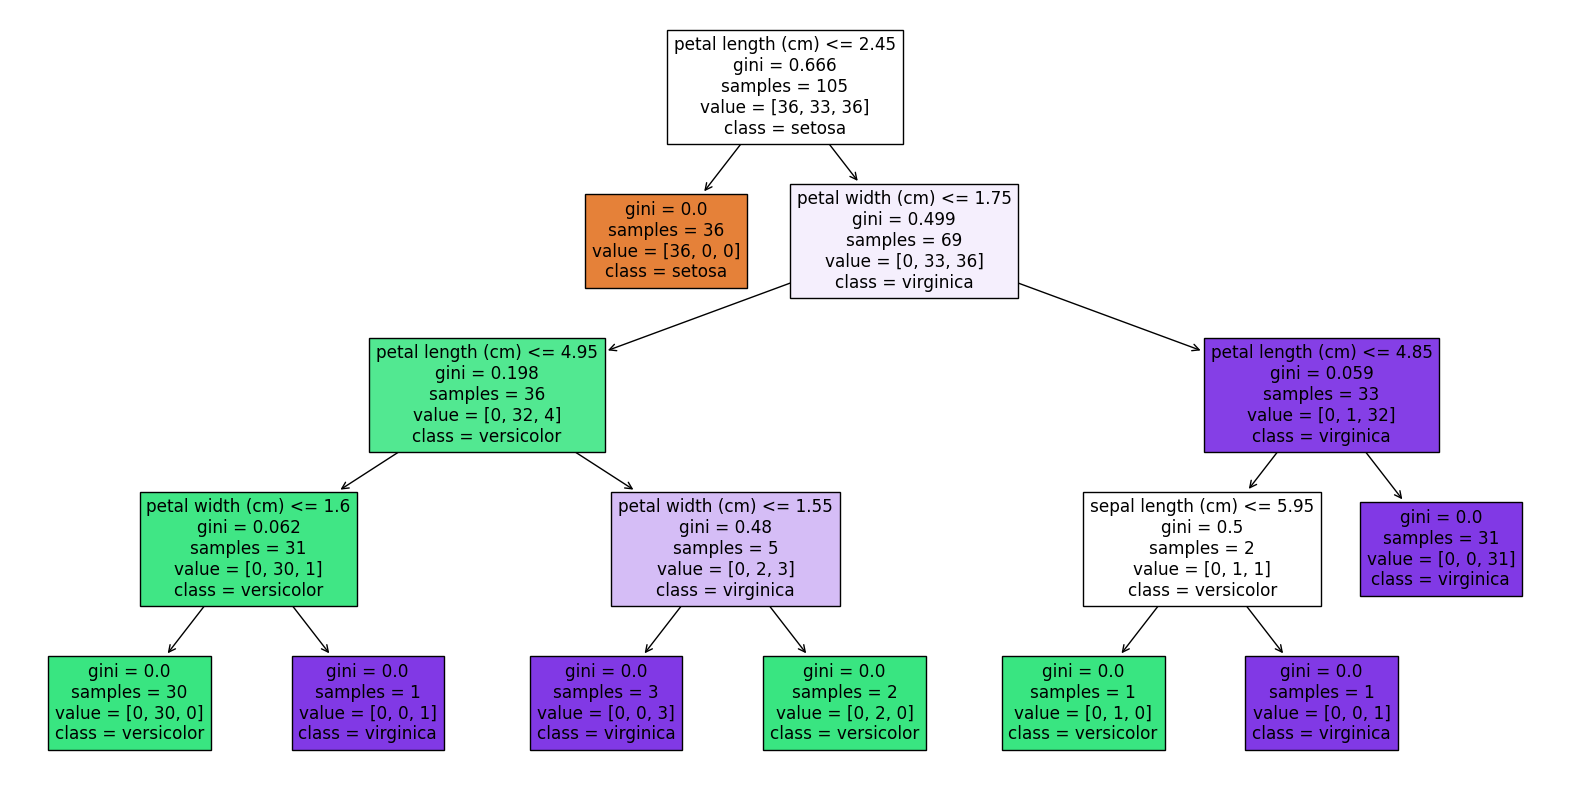

In [20]:

# Visualizar el arbol
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

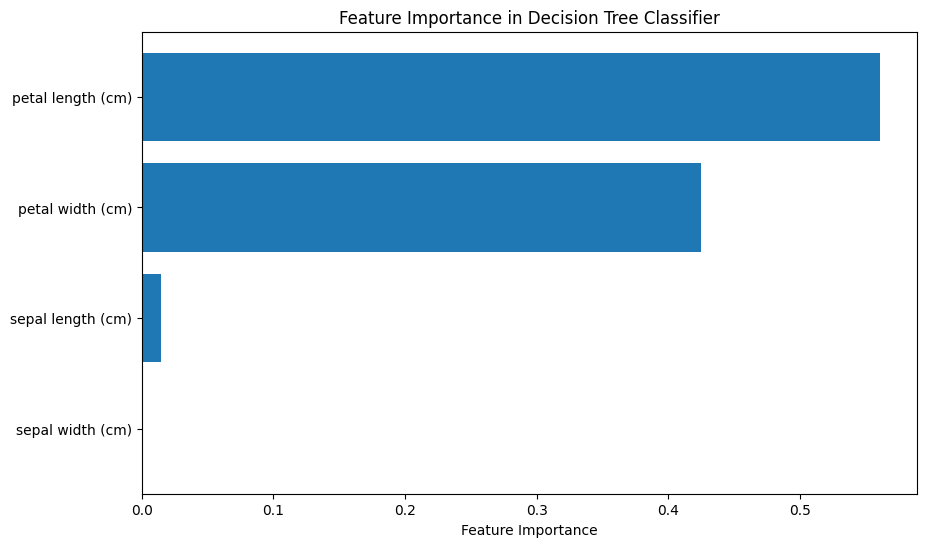

             Feature  Importance
2  petal length (cm)    0.560788
3   petal width (cm)    0.424915
0  sepal length (cm)    0.014297
1   sepal width (cm)    0.000000


In [25]:
# Obener la importancia de las características
feature_importances = clf.feature_importances_
feature_names = iris.feature_names

# Crear un DF
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar los features
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), importance_df['Importance'], align='center')
plt.yticks(np.arange(len(feature_names)), importance_df['Feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

# Print feature importances
print(importance_df)

In [26]:
#generar predicciones
y_pred = clf.predict(X_test)

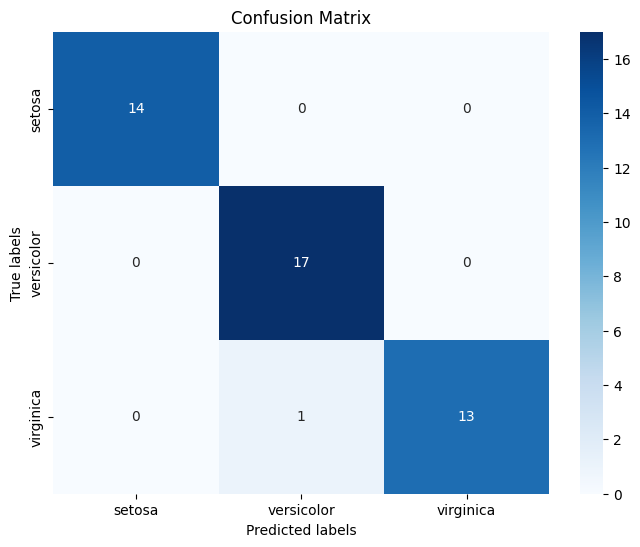

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [27]:
#ahora generar la matriz de confusion.
from sklearn.metrics import confusion_matrix, classification_report

# Obtener la matriz
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Reporte de desempeño
print("Classification Report test:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Otra manera de hacerlo usando bibliotecas

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Accuracy: 0.98


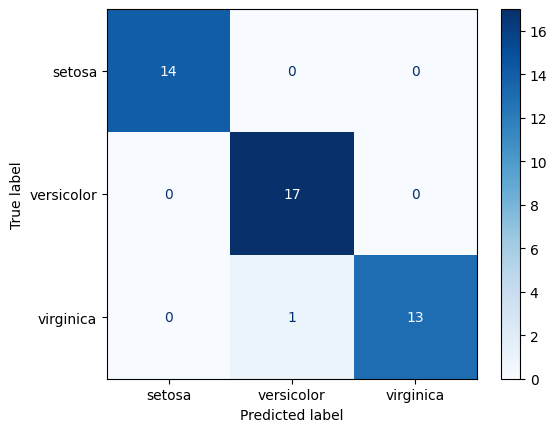

In [31]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()